In [1]:
import math
import keras
import random
import numpy as np
import scipy.stats
import pandas as pd
import seaborn as sns
import tensorflow as tf
from sklearn.svm import SVC
import matplotlib.pyplot as plt
from imblearn.over_sampling import SMOTE
from ydata_profiling import ProfileReport
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, RobustScaler
from sklearn.metrics import classification_report, accuracy_score, precision_score, recall_score, f1_score,roc_auc_score



In [2]:
'''dataset from 'https://www.kaggle.com/datasets/mlg-ulb/creditcardfraud' ''''
df = pd.read_csv('.../creditcard.csv')
df.head(10)


,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
5,2.0,-0.425966,0.960523,1.141109,-0.168252,0.420987,-0.029728,0.476201,0.260314,-0.568671,...,-0.208254,-0.559825,-0.026398,-0.371427,-0.232794,0.105915,0.253844,0.081080,3.67,0
6,4.0,1.229658,0.141004,0.045371,1.202613,0.191881,0.272708,-0.005159,0.081213,0.464960,...,-0.167716,-0.270710,-0.154104,-0.780055,0.750137,-0.257237,0.034507,0.005168,4.99,0
7,7.0,-0.644269,1.417964,1.074380,-0.492199,0.948934,0.428118,1.120631,-3.807864,0.615375,...,1.943465,-1.015455,0.057504,-0.649709,-0.415267,-0.051634,-1.206921,-1.085339,40.80,0
8,7.0,-0.894286,0.286157,-0.113192,-0.271526,2.669599,3.721818,0.370145,0.851084,-0.392048,...,-0.073425,-0.268092,-0.204233,1.011592,0.373205,-0.384157,0.011747,0.142404,93.20,0
9,9.0,-0.338262,1.119593,1.044367,-0.222187,0.499361,-0.246761,0.651583,0.069539,-0.736727,...,-0.246914,-0.633753,-0.120794,-0.385050,-0.069733,0.094199,0.246219,0.083076,3.68,0


In [3]:
print(df.Class.unique())
print(df.Class.value_counts(normalize=True))
print(df.Class.value_counts())
'''Since there is such a massive imbalance in the dataset, so even a simple model would still produce about
99% accuracy.  We will use some technique to balances out the imbalance to avoid bias toward 'Non-Fraud' transaction in the dataset'''

[0 1]
0    0.998273
1    0.001727
Name: Class, dtype: float64
0    284315
1       492
Name: Class, dtype: int64


"Since there is such a massive imbalance in the dataset, so even a simple model would still produce about\n99% accuracy.  We will use some technique to balances out the imbalance to avoid bias toward 'Non-Fraud' transaction in the dataset"

Techniques to deal with Imbalance Data: Oversampling, Undersampling, SMOTE & Ensemble

SMOTE for Data imbalance

In [4]:

X = df.drop(['Class'],axis=1)
y = df['Class'] 

smote = SMOTE(sampling_strategy='minority')
X_sm, y_sm = smote.fit_resample(X,y)
print(y.value_counts())
print(y_sm.value_counts())
print(y_sm.value_counts(normalize=True))
print(X_sm.shape,y_sm.shape)

df_sm = pd.concat([X_sm,y_sm],axis=1)
print(df_sm.shape)

0    284315
1       492
Name: Class, dtype: int64
0    284315
1    284315
Name: Class, dtype: int64
0    0.5
1    0.5
Name: Class, dtype: float64
(568630, 30) (568630,)
(568630, 31)


Ensemble for Data imbalance

In [5]:
X = df.drop(['Class'],axis=1)
y = df['Class'] 

y_ratio =y.value_counts()[1] 

print(y_ratio)



df_classZero = df[df['Class'] == 0]
df_classOne = df[df['Class'] == 1]


df_classZero_one = df_classZero.sample(n=y_ratio)
df_classZero_two = df_classZero.sample(n=y_ratio)
df_classZero_three = df_classZero.sample(n=y_ratio)

def get_train_batch(df_majority,df_minority,minority_ratio):
    df_train = pd.DataFrame()
    df_train = pd.concat([df_majority[0:y_ratio], df_minority],axis='rows')
    X_train = df_train.drop(['Class'],axis=1)
    y_train = df_train['Class']
    return X_train,y_train

get_train_batch(df_classZero, df_classOne,y_ratio)


492


(            Time        V1        V2        V3        V4        V5        V6  \
 0            0.0 -1.359807 -0.072781  2.536347  1.378155 -0.338321  0.462388   
 1            0.0  1.191857  0.266151  0.166480  0.448154  0.060018 -0.082361   
 2            1.0 -1.358354 -1.340163  1.773209  0.379780 -0.503198  1.800499   
 3            1.0 -0.966272 -0.185226  1.792993 -0.863291 -0.010309  1.247203   
 4            2.0 -1.158233  0.877737  1.548718  0.403034 -0.407193  0.095921   
 ...          ...       ...       ...       ...       ...       ...       ...   
 279863  169142.0 -1.927883  1.125653 -4.518331  1.749293 -1.566487 -2.010494   
 280143  169347.0  1.378559  1.289381 -5.004247  1.411850  0.442581 -1.326536   
 280149  169351.0 -0.676143  1.126366 -2.213700  0.468308 -1.120541 -0.003346   
 281144  169966.0 -3.113832  0.585864 -5.399730  1.817092 -0.840618 -2.943548   
 281674  170348.0  1.991976  0.158476 -2.583441  0.408670  1.151147 -0.096695   
 
               V7        V

Random Sub Sampling

In [6]:

df_sample_zero = df[df['Class'] == 0]
df_sample_one = df[df['Class'] == 1]

sampling_size = int(y.value_counts()[1])
max_sampling_index = df_sample_zero.shape[0] - sampling_size
start = random.randint(0,max_sampling_index)
end = start + sampling_size
df_sample_zero = df_sample_zero[start:end]
df_sample = pd.concat([df_sample_zero, df_sample_one], axis=0)
   
print(df_sample.shape)
df_sample['Class'].value_counts()






(984, 31)


0    492
1    492
Name: Class, dtype: int64

We will be using Random Sub Samping to test our models (undersampling the majority)

In [7]:
std_scalar = StandardScaler()
rob_scaler = RobustScaler()

df_sample['Amount'] = rob_scaler.fit_transform(df_sample['Amount'].values.reshape(-1,1))
df_sample['Time'] = rob_scaler.fit_transform(df_sample['Time'].values.reshape(-1,1))

df_sample = df_sample.sample(frac=1, random_state=42) #shuffling the dataset

X_sample = df_sample.drop(['Class'],axis=1)
y_sample = df_sample['Class']



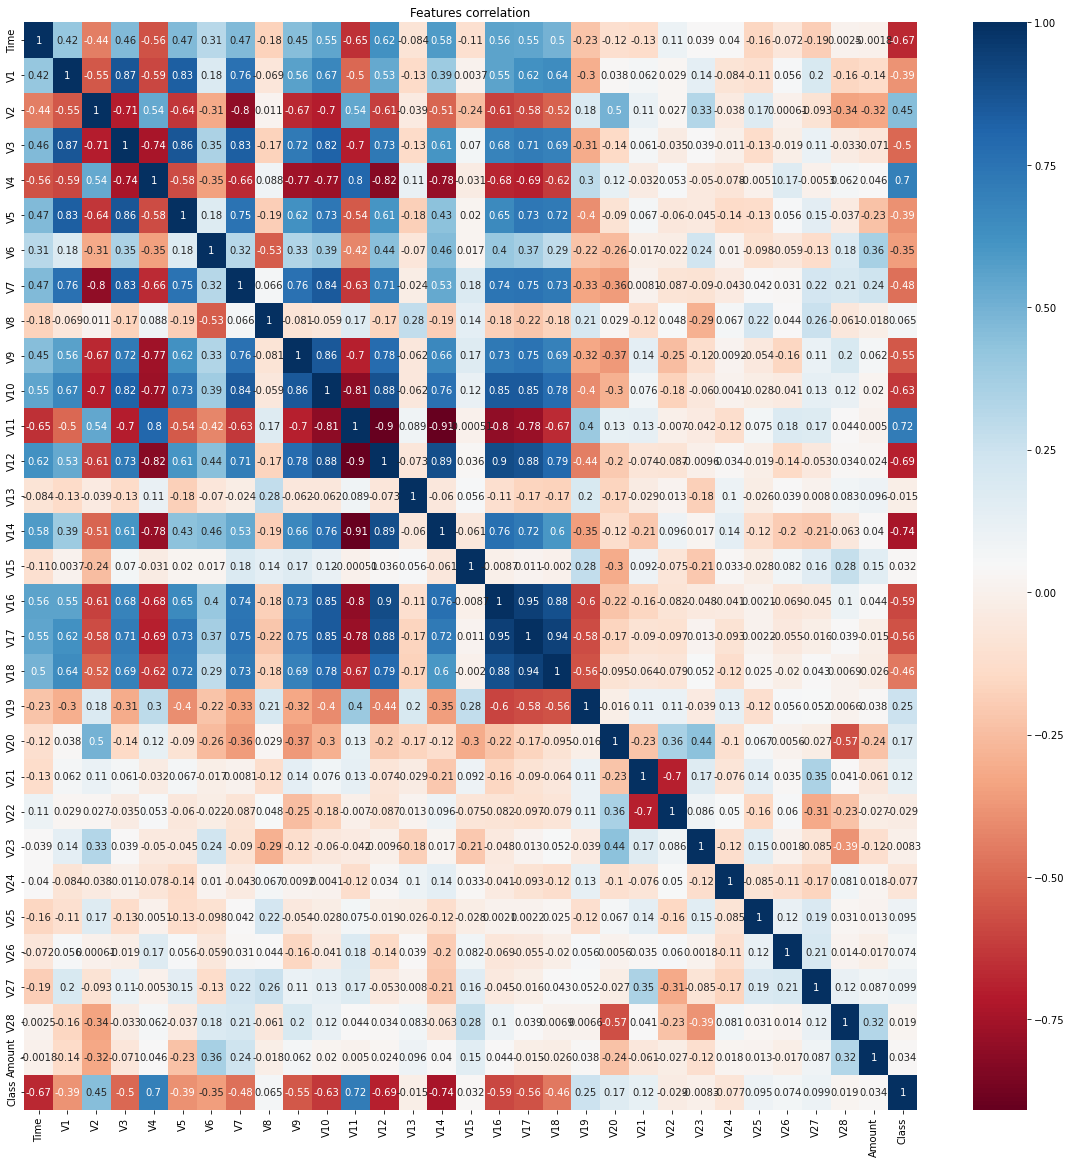

In [8]:
plt.figure(figsize=(20,20))
sns.heatmap(df_sample.corr(),annot=True,cmap='RdBu')
plt.title("Features correlation")
plt.show()

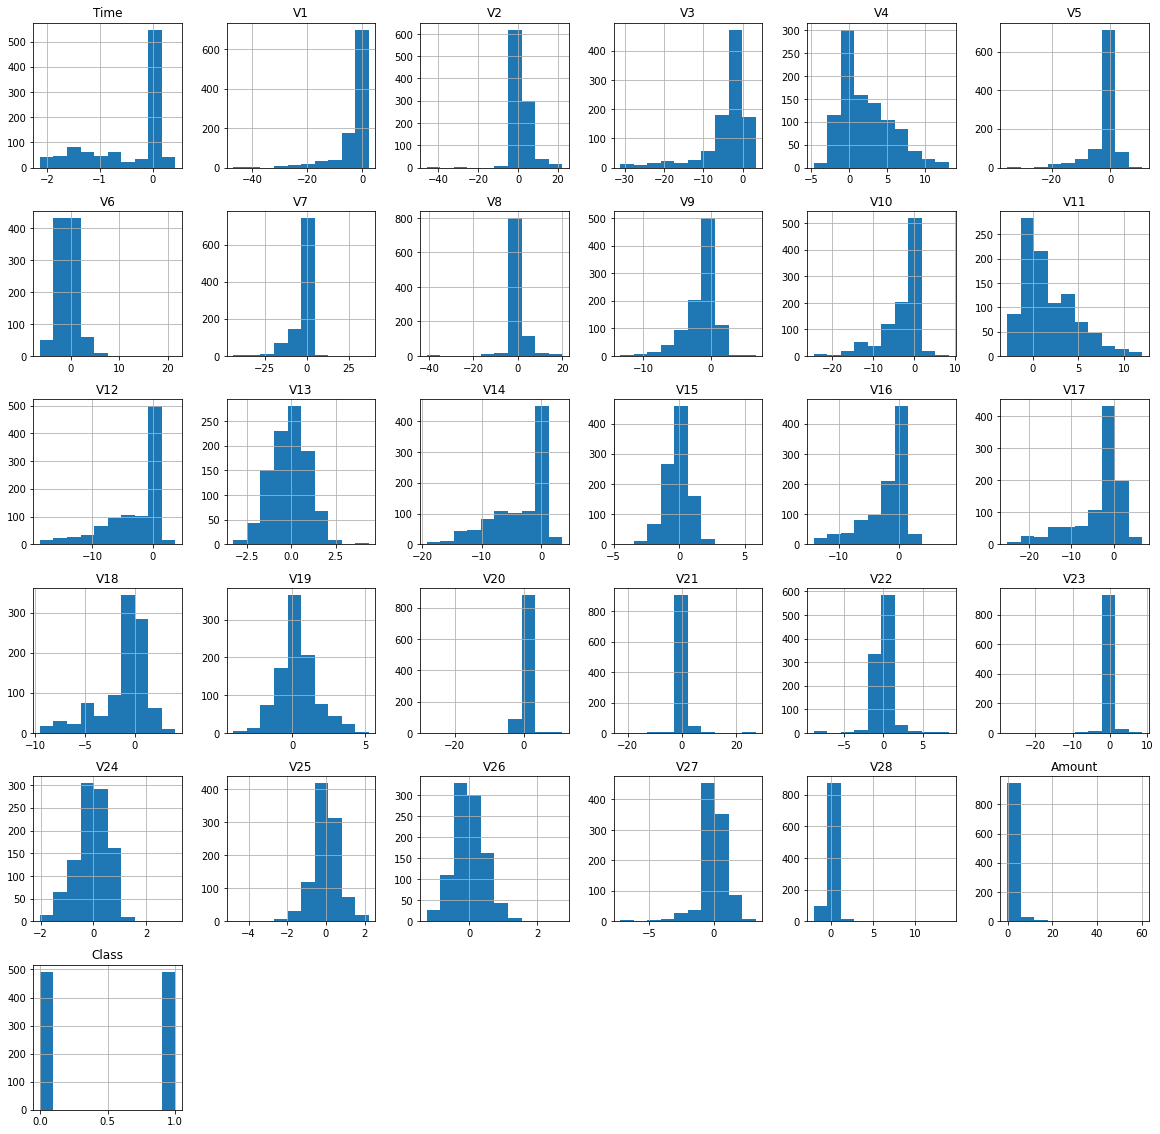

In [9]:
df_sample.hist(figsize=(20,20))
plt.show()

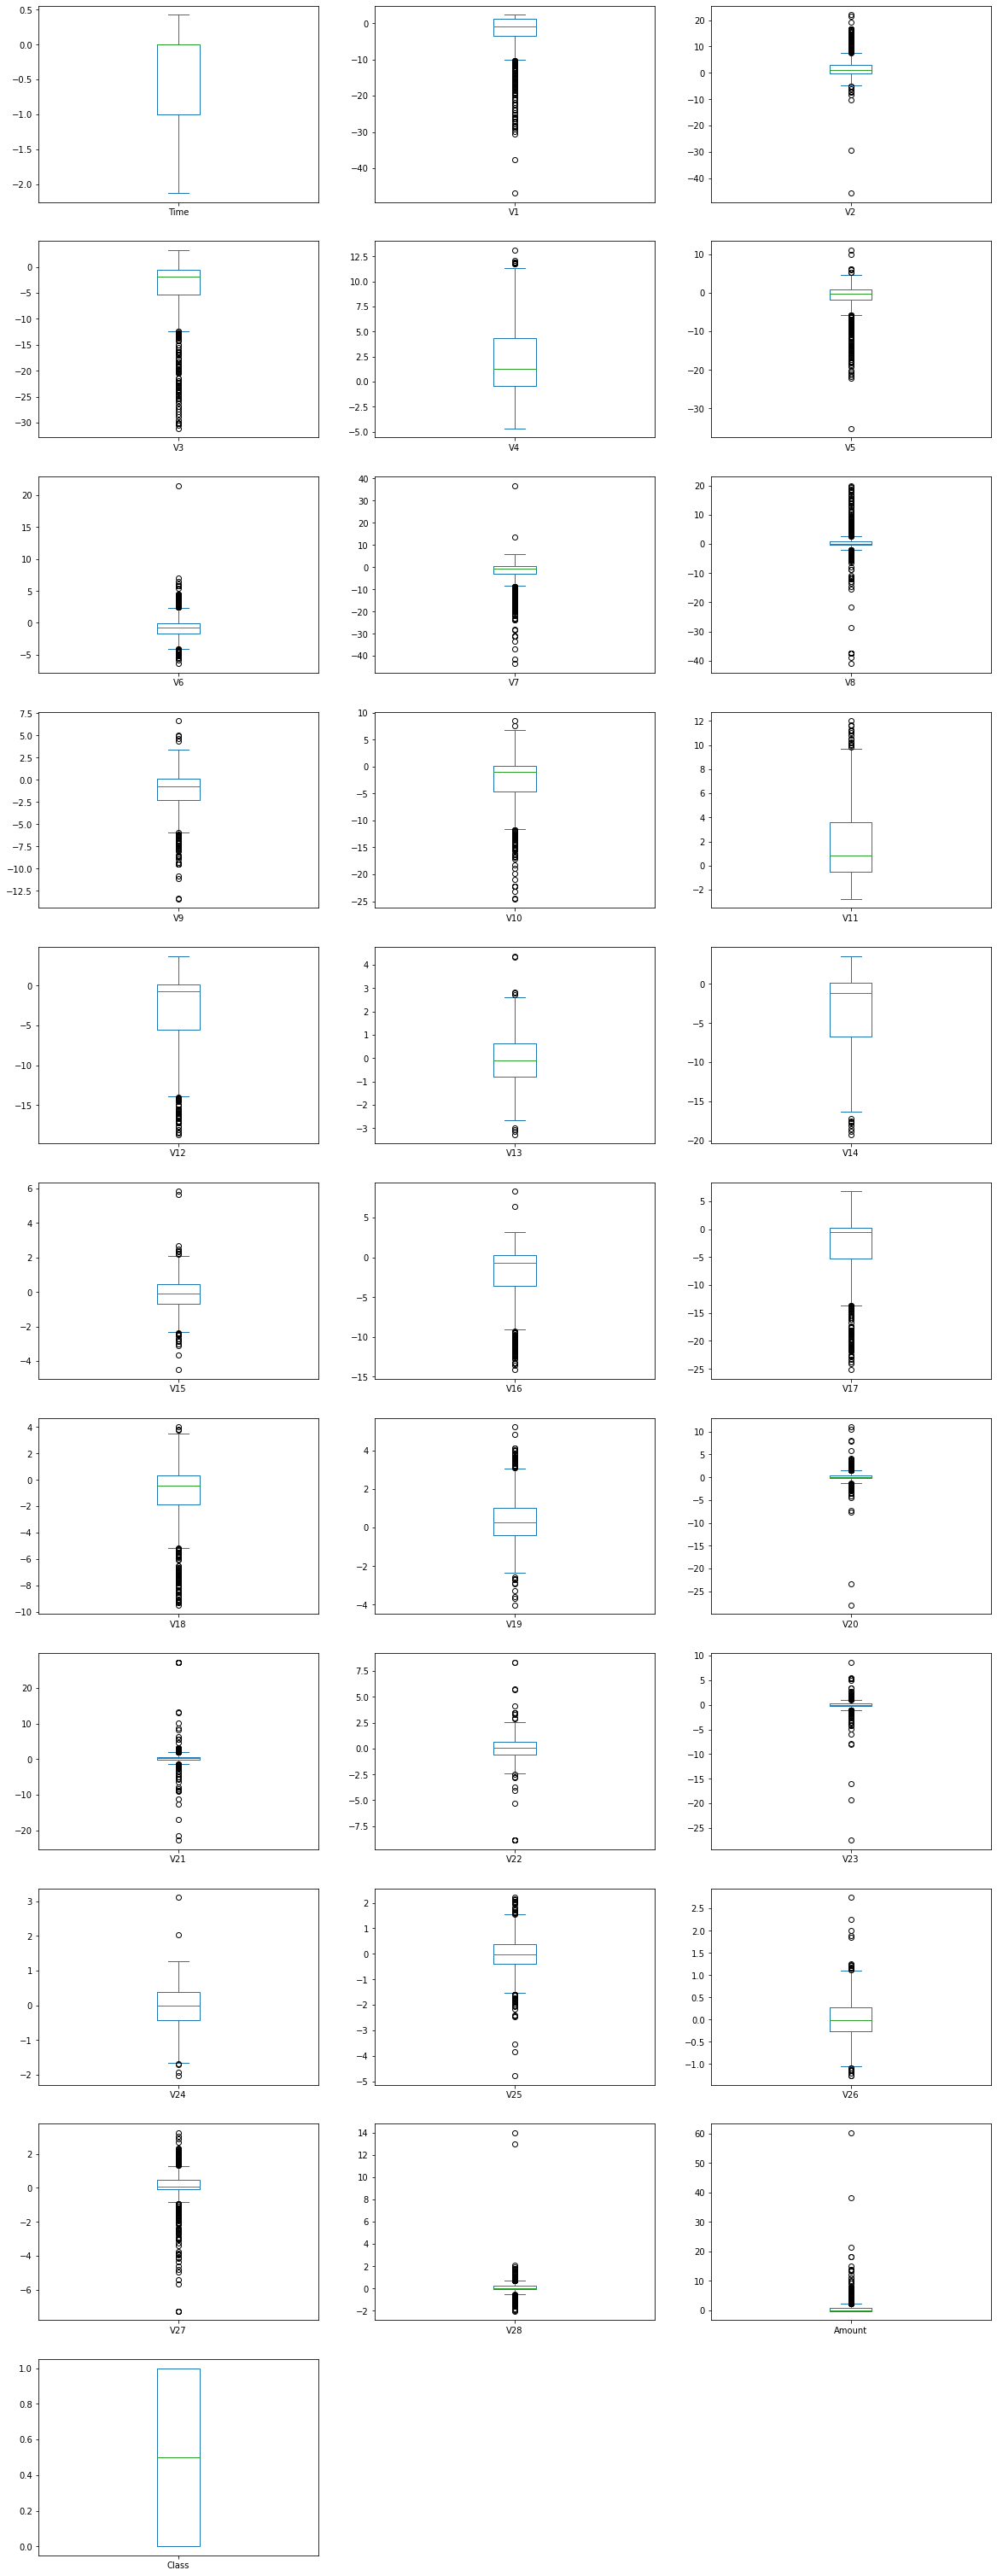

In [10]:
df_sample.plot(kind='box', subplots=True, layout=(12,3), sharex=False, sharey=False, figsize=(20, 60))
plt.show()

Negatively Correlated Feature with 'Class'

<AxesSubplot:xlabel='Class', ylabel='V17'>

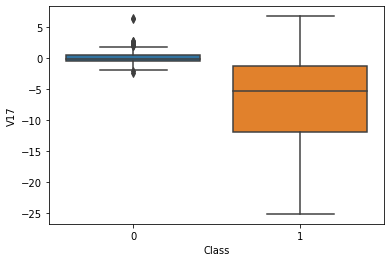

In [11]:
sns.boxplot(x='Class', y='V17', data=df_sample)

<AxesSubplot:xlabel='Class', ylabel='V14'>

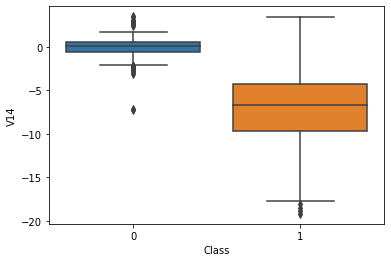

In [12]:
sns.boxplot(x='Class', y='V14', data=df_sample)

<AxesSubplot:xlabel='Class', ylabel='V12'>

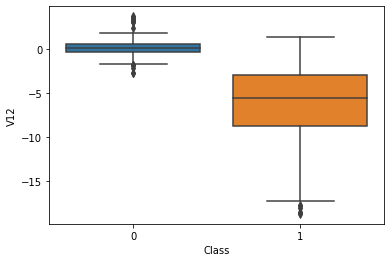

In [13]:
sns.boxplot(x='Class', y='V12', data=df_sample)

<AxesSubplot:xlabel='Class', ylabel='V10'>

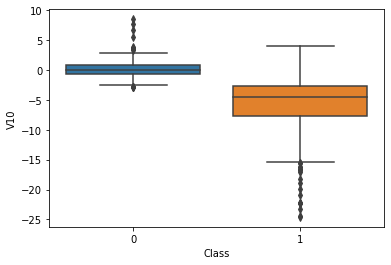

In [14]:
sns.boxplot(x='Class', y='V10', data=df_sample)

Positively Correlated Feature with 'Class'

<AxesSubplot:xlabel='Class', ylabel='V4'>

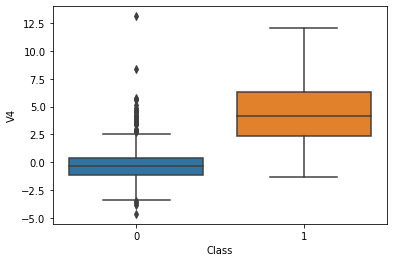

In [15]:
sns.boxplot(x='Class', y='V4', data=df_sample)

<AxesSubplot:xlabel='Class', ylabel='V11'>

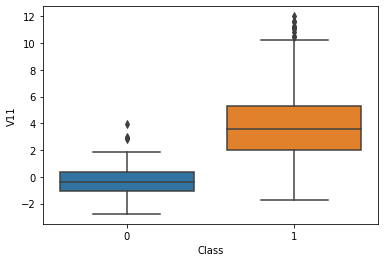

In [16]:
sns.boxplot(x='Class', y='V11', data=df_sample)

<AxesSubplot:xlabel='Class', ylabel='V2'>

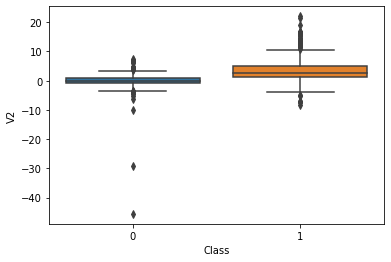

In [17]:
sns.boxplot(x='Class', y='V2', data=df_sample)

<AxesSubplot:xlabel='Class', ylabel='V19'>

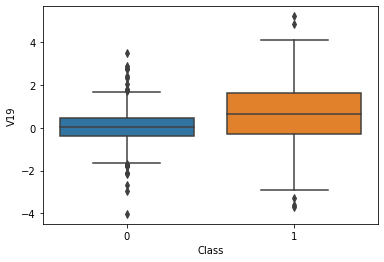

In [18]:
sns.boxplot(x='Class', y='V19', data=df_sample)

Detecting Outlier with IQR

In [19]:
v14_fraud = df_sample['V14'].loc[df_sample['Class'] == 1].values
v14_Q1 = np.percentile(v14_fraud,25)
v14_Q3 = np.percentile(v14_fraud,75)
v14_iqr = v14_Q3 - v14_Q1
v14_lower = v14_Q1 - 1.5 * v14_iqr
v14_upper = v14_Q3 + 1.5 * v14_iqr
v14_outliers = [x for x in v14_fraud if x < v14_lower or x > v14_upper]

df_sample = df_sample.drop(df_sample[(df_sample['V14'] > v14_upper) | (df_sample['V14'] < v14_lower)].index)

print(f'V14 Lower: {v14_lower}')
print(f'V14 Upper: {v14_upper}')
print(f'V14 Outlier: {v14_outliers}')
print('--' * 20)

#V10
v10_fraud = df_sample['V10'].loc[df_sample['Class'] == 1].values
v10_Q1 = np.percentile(v10_fraud,25)
v10_Q3 = np.percentile(v10_fraud,75)
v10_iqr = v10_Q3 - v10_Q1
v10_lower = v10_Q1 - 1.5 * v10_iqr
v10_upper = v10_Q3 + 1.5 * v10_iqr
v10_outliers = [x for x in v10_fraud if x < v10_lower or x > v10_upper]


print(f'V10 Lower: {v10_lower}')
print(f'V10 Upper: {v10_upper}')
print(f'V10 Outlier: {v10_outliers}')
print('--' * 20)

df_sample = df_sample.drop(df_sample[(df_sample['V10'] > v10_upper) | (df_sample['V10'] < v10_lower)].index)
#V12
v12_fraud = df_sample['V12'].loc[df_sample['Class'] == 1].values
v12_Q1 = np.percentile(v12_fraud,25)
v12_Q3 = np.percentile(v12_fraud,75)
v12_iqr = v12_Q3 - v12_Q1
v12_lower = v12_Q1 - 1.5 * v12_iqr
v12_upper = v12_Q3 + 1.5 * v12_iqr
v12_outliers = [x for x in v12_fraud if x < v12_lower or x > v12_upper]

df_sample = df_sample.drop(df_sample[(df_sample['V12'] > v12_upper) | (df_sample['V12'] < v12_lower)].index)

print(f'V12 Lower: {v12_lower}')
print(f'V12 Upper: {v12_upper}')
print(f'V12 Outlier: {v12_outliers}')


V14 Lower: -17.807576138200666
V14 Upper: 3.8320323237414167
V14 Outlier: [-18.0499976898594, -18.4937733551053, -19.2143254902614, -18.8220867423816]
----------------------------------------
V10 Lower: -15.036764896984362
V10 Upper: 4.962115234726538
V10 Outlier: [-16.6496281595399, -20.9491915543611, -15.1237521803455, -22.1870885620007, -22.1870885620007, -15.1241628144947, -22.1870885620007, -22.1870885620007, -18.2711681738888, -16.6011969664137, -15.2399619587112, -15.5637913387301, -23.2282548357516, -18.9132433348732, -16.2556117491401, -19.836148851696, -15.3460988468775, -24.4031849699728, -15.5637913387301, -24.5882624372475, -15.2399619587112, -17.1415136412892, -16.3035376590131, -15.2318333653018, -16.7460441053944]
----------------------------------------
V12 Lower: -16.009010326850483
V12 Upper: 5.128181000699154
V12 Outlier: [-17.1829184301947, -17.003289445516, -16.5581971409376, -18.0475965708216, -16.3880541668327, -16.4655039422141, -16.218610393127, -18.5536970096

Splitting Data for Training and Testing


In [20]:

X_sample = df_sample.drop(['Class'],axis=1)
y_sample = df_sample['Class']
X_train,X_test,y_train,y_test = train_test_split(X_sample,y_sample, test_size=0.2)

In [21]:
algo = {
    'LogisticRegression': LogisticRegression(),
    'KNearest':KNeighborsClassifier(),
    'SV Classifier':SVC(),
    'Random Forest':RandomForestClassifier()
}


for key, classifier in algo.items():
    model = classifier
    model.fit(X_train, y_train)
    training_score = cross_val_score(model, X_train, y_train, cv=5)
    print(f'Classifiers: {model} --- Training Score: {round(training_score.mean(), 2) * 100} % accuracy score')

Classifiers: LogisticRegression() --- Training Score: 97.0 % accuracy score
Classifiers: KNeighborsClassifier() --- Training Score: 93.0 % accuracy score
Classifiers: SVC() --- Training Score: 93.0 % accuracy score
Classifiers: RandomForestClassifier() --- Training Score: 99.0 % accuracy score


Learning Curve

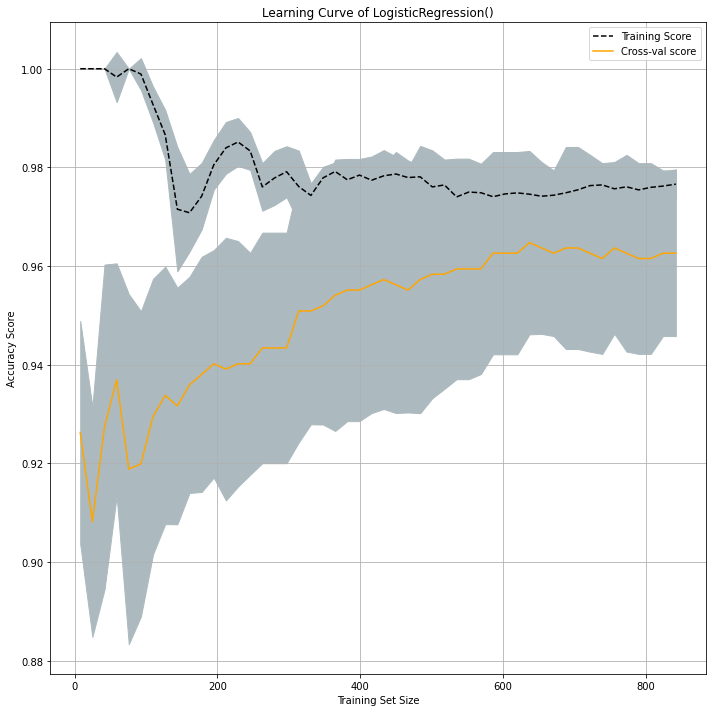

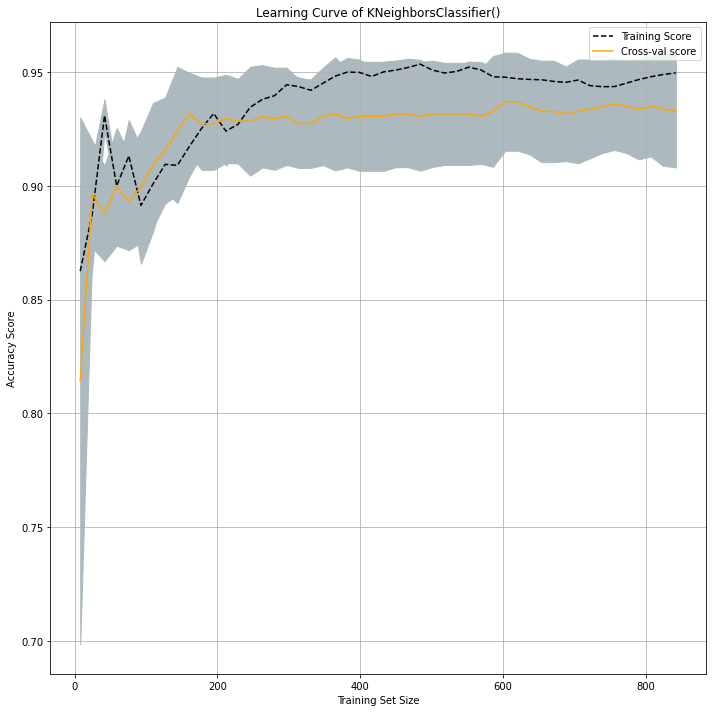

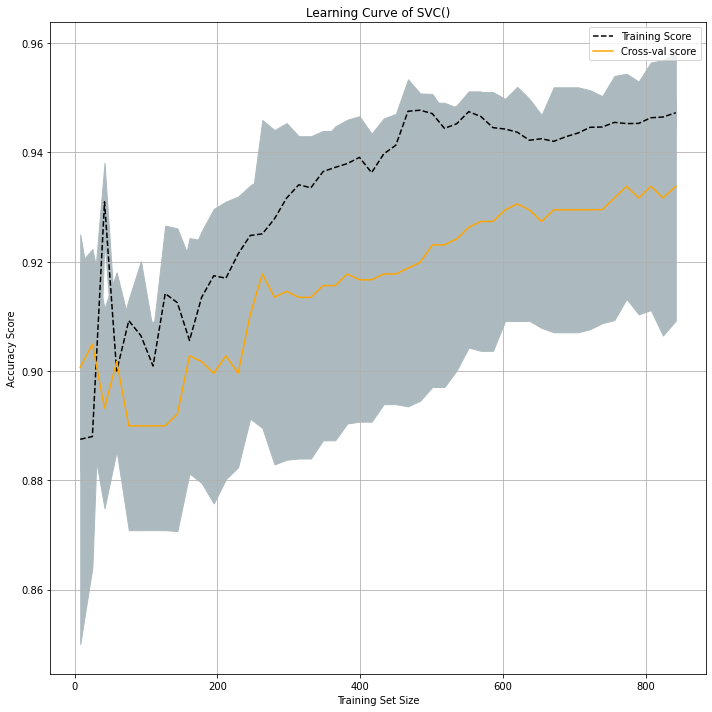

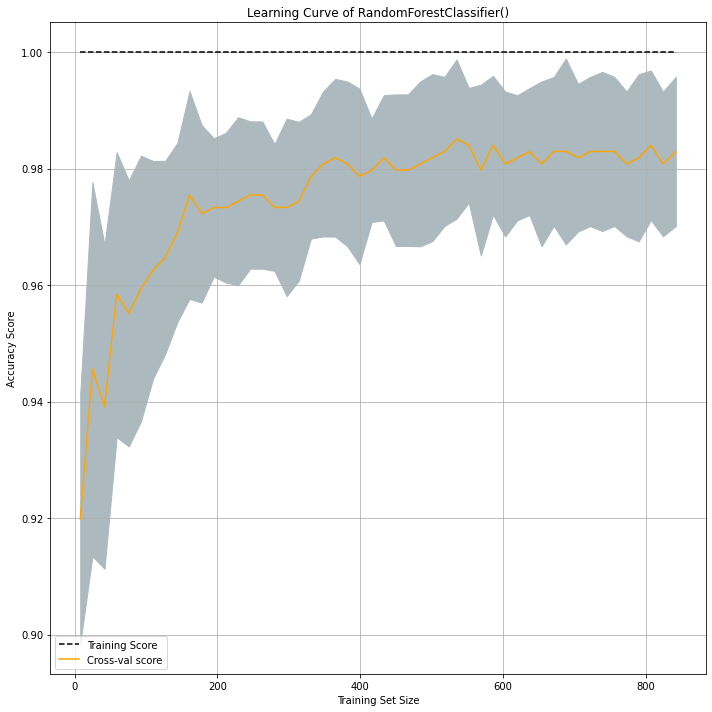

In [22]:
from sklearn.model_selection import learning_curve

def learning():
    algo = {
    'LogisticRegression': LogisticRegression(),
    'KNearest':KNeighborsClassifier(),
    'SV Classifier':SVC(),
    'Random Forest':RandomForestClassifier()
    }
    for key, classifier in algo.items():
        model = classifier
        train_sizes,train_scores,test_scores = learning_curve(model,
                                                            X_sample,y_sample,cv=10,scoring='accuracy',
                                                            n_jobs=-1,
                                                            train_sizes=np.linspace(0.01,1.0,50)
        )
        train_mean = np.mean(train_scores,axis=1)
        train_std = np.std(train_scores,axis=1)
        test_mean = np.mean(test_scores,axis=1)
        test_std = np.std(test_scores,axis=1)
        plt.subplots(1,figsize=(10,10))

        plt.plot(train_sizes,train_mean, '--', color='black', label='Training Score')
        plt.plot(train_sizes,test_mean,color='orange',label='Cross-val score')
        plt.fill_between(train_sizes,train_mean - train_std, train_mean+train_std,color='#ACBABF')
        plt.fill_between(train_sizes,test_mean - test_std, test_mean+test_std,color='#ACBABF')
        plt.title(f"Learning Curve of {model}")
        plt.xlabel("Training Set Size")
        plt.ylabel("Accuracy Score")
        plt.legend(loc='best')
        plt.grid(True)
        plt.tight_layout();plt.show()

learning()


